In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/Datasets/Salary_Data.csv')
d

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
d.isna().sum()

,0
YearsExperience,0
Salary,0


In [3]:
d.dtypes

,0
YearsExperience,float64
Salary,float64


In [4]:
X=d.iloc[:,:-1]
y=d.iloc[:,-1]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred=lr.predict(X_test)
y_pred

array([ 74821.41578619,  91385.43626305,  61938.28874864,  81262.97930497,
        67459.62890759,  88624.76618357, 113470.79689886,  44454.04491195,
       106109.01002026])

In [10]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
17,83088.0,74821.415786
21,98273.0,91385.436263
10,63218.0,61938.288749
19,93940.0,81262.979305
14,61111.0,67459.628908
20,91738.0,88624.766184
26,116969.0,113470.796899
3,43525.0,44454.044912
24,109431.0,106109.010020


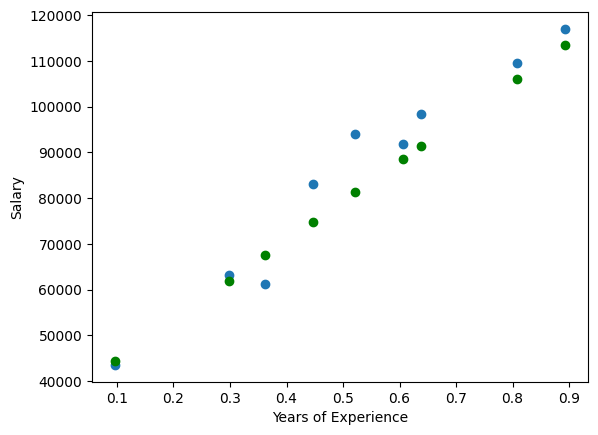

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,c='green')

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print('R2_score:',r2_score(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean squared error:',root_mean_squared_error(y_test,y_pred))

R2_score: 0.9248580247217076
mean absolute error: 5146.8867348882295
mean squared error: 39139215.999588534
root mean squared error: 6256.134269625975
